In [2]:
import numpy as np
import pandas as pd

#  Data Structures: Series and DataFrames


## Series

A Series is a one-dimensional array-like object capable of holding any data type (integers, strings, floating points, Python objects, etc.).

In [ ]:
# from list

data = [1, 5, 7, 4]
series_list = pd.Series(data)
series_list

0    1
1    5
2    7
3    4
dtype: int64

In [ ]:
# from dictionary

data = {'a':1, 'b':2, 'c':3}
series_dict = pd.Series(data)
series_dict

a    1
b    2
c    3
dtype: int64

### Basic Attributes of a Series


In [ ]:
print(f"shape: {series_dict.shape}")
print(f"size: {series_dict.size}")
print(f"data type: {series_dict.dtype}")

shape: (3,)
size: 3
data type: int64


## DtataFrames

A DataFrame is a two-dimensional, and potentially heterogeneous (meaning it combines different data types, for example strings and numbers) tabular data structure with labeled axes (rows and columns). It is suitable for representing real-world data.

In [ ]:
# from list of list

data = [[1, 'Alice'], [2, 'Bob'], [3, 'Charlie']]
df_list = pd.DataFrame(data, columns=["ID", "Name"])
df_list

,ID,Name
0,1,Alice
1,2,Bob
2,3,Charlie


In [ ]:
# form dictionary

data = {'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']}
df_dict = pd.DataFrame(data)
df_dict

,ID,Name
0,1,Alice
1,2,Bob
2,3,Charlie


In [ ]:
# Accessing DataFrame attributes
print("Shape:", df_list.shape) # (rows, columns)
print("Size:", df_list.size) # Total number of elements in the DataFrame
print("Data types:\n", df_list.dtypes)

Shape: (3, 2)
Size: 6
Data types:
 ID       int64
Name    object
dtype: object


# Basic Operations with DataFrames

In [ ]:
data = {'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35], 'City': ['New York', 'Paris', 'London']} #here we're defining a sample dataframe
df = pd.DataFrame(data)

In [ ]:
# Accessing multiple columns

subdata = df[['Name', 'City']]
subdata

,Name,City
0,Alice,New York
1,Bob,Paris
2,Charlie,London


In [ ]:
print(df[:2])

print("\n********************************\n")

print(df['Name'][:2])

print("\n********************************\n")

print(df[df['Age'] >= 20])

    Name  Age      City
0  Alice   25  New York
1    Bob   30     Paris

********************************

0    Alice
1      Bob
Name: Name, dtype: object

********************************

      Name  Age      City
0    Alice   25  New York
1      Bob   30     Paris
2  Charlie   35    London


## Introduction to .loc and .iloc Selectors
Pandas provides two powerful methods for explicitly indexing rows and columns: .loc for label-based indexing and .iloc for positional indexing.

.loc


In [ ]:
alice_row = df.loc[df.Name == 'Alice']
alice_row

,Name,Age,City
0,Alice,25,New York


In [ ]:
# Selecting rows and specifying columns

name_and_age = df.loc[df.Age >= 30, ['Name', 'Age']]
name_and_age

,Name,Age
1,Bob,30
2,Charlie,35


.iloc

In [ ]:
idx_row = df.iloc[2]
idx_row

Name    Charlie
Age          35
City     London
Name: 2, dtype: object

In [ ]:
sub_data = df.iloc[:2, :2]# First two rows and first two columns
sub_data

,Name,Age
0,Alice,25
1,Bob,30


# Data Manipulation in Pandas
## Adding a new column

In [ ]:
data = {'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [45, 30, 35]}
df = pd.DataFrame(data)

In [ ]:
df['Years'] = [3, 5, 2]
df

,Name,Age,Years
0,Alice,45,3
1,Bob,30,5
2,Charlie,35,2


## Deleting a Column

In [ ]:
df.drop("Years", axis = 1, inplace = True)
df

,Name,Age
0,Alice,45
1,Bob,30
2,Charlie,35


## Renaming columns

In [ ]:
df.rename(columns = {'Name': 'name_e', 'Age':'age_e'}, inplace=True)
df

,name_e,age_e
0,Alice,45
1,Bob,30
2,Charlie,35


## Sorting Data

In [ ]:
sorted_age = df.sort_values(by="age_e")
sorted_age

,name_e,age_e
1,Bob,30
2,Charlie,35
0,Alice,45


## Applying Functions

In [ ]:
df['age_e'] = df["age_e"].apply(lambda x: x+1)
df

,name_e,age_e
0,Alice,46
1,Bob,31
2,Charlie,36


# Handling Missing Data in Pandas
## Identifying Missing Data
To identify missing data, Pandas uses two main methods: isnull() and notnull().

In [ ]:
data = {'Name': ['Alice', 'Bob', None], 'Age': [25, None, 30], 'City': ['New York', 'Paris', np.nan]}
df = pd.DataFrame(data)

missing_val = df.isnull()
missing_val

,Name,Age,City
0,False,False,False
1,False,True,False
2,True,False,True


## Strategies to Handle Missing Data
There are primarily two strategies to handle missing data: dropping missing values or filling them in.

Dropping Missing Values with dropna()
If the dataset is large and the number of missing values is minimal, dropping rows or columns with missing data can be a viable option.

In [ ]:
df_nut_null = df.dropna()
df_nut_null

,Name,Age,City
0,Alice,25.0,New York


Filling Missing Values with fillna()
Another approach is to fill in missing data with a specific value or a computed value (mean, median, etc.), depending on the context.

In [ ]:
df_filles = df.fillna('0')
df_filles

,Name,Age,City
0,Alice,25.0,New York
1,Bob,0,Paris
2,0,30.0,0


## Using notnull() to Filter Non-missing Data

In [ ]:
df_not_null = df[df['Age'].notnull()]
df_not_null

,Name,Age,City
0,Alice,25.0,New York
2,None,30.0,NaN


# **Saving and Loading Data with Pandas**

In [ ]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'London']
}
df = pd.DataFrame(data)


## Saving the DataFrame to a CSV File

In [ ]:
df.to_csv('sample_data.csv', index=False)


## Saving the DataFrame to an Excel File

In [ ]:
df.to_excel('sample_data.xlsx', index=False, engine='openpyxl') #the engine part is to ensure this works in colab


## Loading Data from the CSV File

In [ ]:
df_from_csv = pd.read_csv('sample_data.csv')

## Loading Data from the Excel File

In [ ]:
df_from_excel = pd.read_excel('sample_data.xlsx', engine='openpyxl')



## Descriptive Statistics

Pandas offers several methods to get a quick overview of your dataset's statistical properties.

### Using `describe()`, `mean()`, `median()`, `min()`, `max()`, and `std()`


## Unique Values and Value Counts

Understanding the distribution of categorical data is facilitated by examining the unique values and their frequency within your dataset.

### Exploring with `unique()` and `value_counts()`


In [ ]:
# Sample DataFrame
data = {'scores': [88, 92, 80, 89, 100, 77, 92, 85],
        'time': [9, 10, 9, 8, 10, 9, 9, 8]}
df = pd.DataFrame(data)

# Descriptive Statistics
print("Descriptive Statistics:\n", df.describe())
print("\nMean Scores:", df['scores'].mean())
print("Median Time:", df['time'].median())
print("Minimum Score:", df['scores'].min())
print("Maximum Time:", df['time'].max())
print("Standard Deviation in Scores:", df['scores'].std())

Descriptive Statistics:
            scores       time
count    8.000000   8.000000
mean    87.875000   9.000000
std      7.278883   0.755929
min     77.000000   8.000000
25%     83.750000   8.750000
50%     88.500000   9.000000
75%     92.000000   9.250000
max    100.000000  10.000000

Mean Scores: 87.875
Median Time: 9.0
Minimum Score: 77
Maximum Time: 10
Standard Deviation in Scores: 7.278883352351709


In [ ]:

print("Unique Times:", df['time'].unique())
print("\nTime Value Counts:\n", df['time'].value_counts())

Unique Times: [ 9 10  8]

Time Value Counts:
 time
9     4
10    2
8     2
Name: count, dtype: int64


**Merge:** Use .merge() to combine DataFrames based on a common column or index.
**Join:** Use .join() to combine DataFrames based on index.

In [17]:
# Merging DataFrames
df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie']
})
df2 = pd.DataFrame({
    'ID': [1, 2, 4],
    'Score': [85, 90, 78]
})
merged_df = pd.merge(df1, df2, on='ID', how='inner')
print(merged_df)

   ID   Name  Score
0   1  Alice     85
1   2    Bob     90


In [25]:
# Merging DataFrames
df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie']
})
df2 = pd.DataFrame({
    'ID': [1, 2, 4],
    'Score': [85, 90, 78]
})
joined_df = df1.join(df2, lsuffix='ID')
print(joined_df)

   IDID     Name  ID  Score
0     1    Alice   1     85
1     2      Bob   2     90
2     3  Charlie   4     78


# Grouping and Aggregation

In [27]:
data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda'],
    'Age': [28, 24, 35, 32],
    'City': ['New York', 'Paris', 'Berlin', 'London']
}
df = pd.DataFrame(data)

grouped = df.groupby('City').agg({'Age': 'mean'})
print(grouped)

           Age
City          
Berlin    35.0
London    32.0
New York  28.0
Paris     24.0


# Hierarchical Indexing and Multi-index

Hierarchical indexing is also known as multi-level indexing. It allows you to have multiple index levels on an axis. (Do refer to the week 5 material if you need a reminder on what indexing is!)

It allows you to represent higher-dimensional data in a two-dimensional DataFrame, giving a structured method of data organization and access.

In [2]:
index = pd.MultiIndex.from_tuples( [ ('A', 1), ('A', 2), ('B', 1), ('B', 2) ] )

data = {'values': [10, 20, 30, 40]}

df = pd.DataFrame(data, index=index)
df


values
A 1      10
  2      20
B 1      30
  2      40

In [3]:
df.loc['A']

,values
1,10
2,20


In [4]:
#Resetting index with pandas function

df_reset = df.reset_index()
df_reset

,level_0,level_1,values
0,A,1,10
1,A,2,20
2,B,1,30
3,B,2,40


# **Time Series Analysis with Pandas**

In [5]:
date_range = pd.date_range(start='2024-01-31', end= '2025-01-01', freq='M')
print(date_range)

data = pd.Series([i for i in range(1, 13)], index = date_range)
data

DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', freq='M')


2024-01-31     1
2024-02-29     2
2024-03-31     3
2024-04-30     4
2024-05-31     5
2024-06-30     6
2024-07-31     7
2024-08-31     8
2024-09-30     9
2024-10-31    10
2024-11-30    11
2024-12-31    12
Freq: M, dtype: int64

## Resampling

In [14]:
# upsample
yearly_data = data.resample('Y').mean()
yearly_data

2024-12-31    6.5
Freq: A-DEC, dtype: float64

In [15]:
# downsample
hourly_data = data.asfreq('H', method='ffill')
hourly_data


2024-01-31 00:00:00     1
2024-01-31 01:00:00     1
2024-01-31 02:00:00     1
2024-01-31 03:00:00     1
2024-01-31 04:00:00     1
                       ..
2024-12-30 20:00:00    11
2024-12-30 21:00:00    11
2024-12-30 22:00:00    11
2024-12-30 23:00:00    11
2024-12-31 00:00:00    12
Freq: H, Length: 8041, dtype: int64

## Rolling Window Calculations and Expanding Windows

In [6]:
date_range = pd.date_range(start='2024-01-01', end= '2024-01-05', freq='D')
print(date_range)

data = pd.Series([i for i in range(1, 6)], index = date_range)
data

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05'],
              dtype='datetime64[ns]', freq='D')


2024-01-01    1
2024-01-02    2
2024-01-03    3
2024-01-04    4
2024-01-05    5
Freq: D, dtype: int64

In [7]:
#Calculate the rolling average over a window of size 2
rolling_avg = data.rolling(window=2).mean()
print(rolling_avg)


2024-01-01    NaN
2024-01-02    1.5
2024-01-03    2.5
2024-01-04    3.5
2024-01-05    4.5
Freq: D, dtype: float64


In [8]:
#Calculate the expanding sum
expanding_sum = data.expanding().sum()
print(expanding_sum)

2024-01-01     1.0
2024-01-02     3.0
2024-01-03     6.0
2024-01-04    10.0
2024-01-05    15.0
Freq: D, dtype: float64


# Visualization with Pandas

##  Integration with Seaborn

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [10, 20, 30, 40, 50]
})
data

,x,y
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


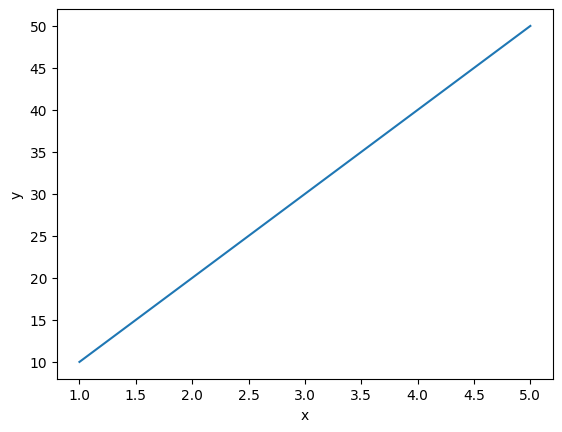

In [11]:
sns.lineplot(data = data, x = 'x', y = 'y')
plt.show()

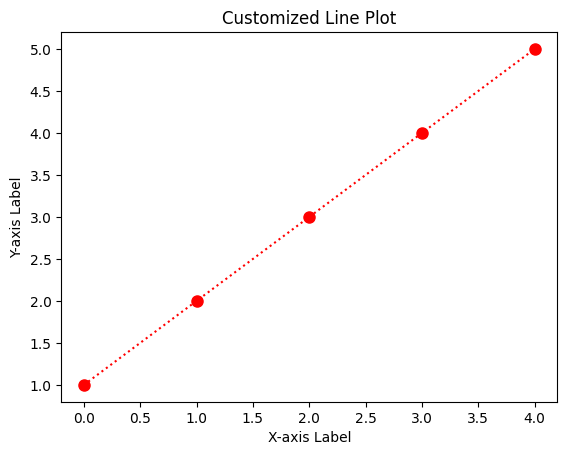

In [13]:
data['x'].plot(color = 'red', linestyle='dotted', marker = 'o', markersize = 8)
plt.title('Customized Line Plot')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

#Plotting time series data

2024-01-01    10
2024-01-02    20
2024-01-03    30
2024-01-04    40
2024-01-05    50
Freq: D, dtype: int64


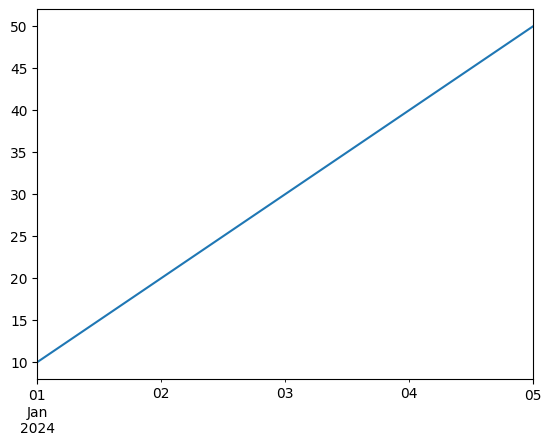

In [15]:

data = pd.Series([10, 20, 30, 40, 50], index=date_range)
print(data)
data.plot()
plt.show()

##  Pandas integrates with libraries like Plotly and Bokeh to create interactive visualizations directly from DataFrame objects.

In [16]:
import plotly.express as px

df = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'],
    'Value': [10, 20, 30, 40]
})

# Create an interactive bar plot with Plotly
fig = px.bar(df, x='Category', y='Value', title='Interactive Bar Plot')
fig.show()